In [1]:
# AID304 - Big Data Analytics: Case Study
# Student: JasirColovic
# Dataset: World Happiness Report (Kaggle)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [6]:
# Load the dataset
url = "/2019.csv"
df = pd.read_csv(url)

In [7]:
# Verify data loading
print("First 5 rows of the dataset:")
print(df.head())
print("\nColumns:", df.columns.tolist())

First 5 rows of the dataset:
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                  

In [9]:
 #Brief explanation of the dataset
print("\nDataset Description:")
print("The World Happiness Report dataset contains happiness scores and contributing factors for various countries in 2019.")
print("Variables include Happiness Score, GDP per Capita, Social Support, Healthy Life Expectancy, Freedom, Generosity, and Perceptions of Corruption.")



Dataset Description:
The World Happiness Report dataset contains happiness scores and contributing factors for various countries in 2019.
Variables include Happiness Score, GDP per Capita, Social Support, Healthy Life Expectancy, Freedom, Generosity, and Perceptions of Corruption.


In [11]:
 #Dataset source and format
print("\nDataset Source and Format:")
print("Source: Kaggle (https://www.kaggle.com/datasets/unsdsn/world-happiness), accessed via GitHub raw link")
print("Format: CSV")


Dataset Source and Format:
Source: Kaggle (https://www.kaggle.com/datasets/unsdsn/world-happiness), accessed via GitHub raw link
Format: CSV


In [12]:
#Number of observations and variables
print("\nDataset Dimensions:")
print(f"Number of observations: {df.shape[0]}")
print(f"Number of variables: {df.shape[1]}")


Dataset Dimensions:
Number of observations: 156
Number of variables: 9


In [18]:
# Explore the dataset
# Check data types
print("\nData Types:")
print(df.dtypes)

print("\nNull Values:")
print(df.isnull().sum())


Data Types:
Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

Null Values:
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


In [19]:
# Check number of unique values per column
print("\nUnique Values per Column:")
print(df.nunique())


Unique Values per Column:
Overall rank                    156
Country or region               156
Score                           155
GDP per capita                  146
Social support                  145
Healthy life expectancy         119
Freedom to make life choices    130
Generosity                      118
Perceptions of corruption       113
dtype: int64


In [20]:
#  Check for outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

numeric_cols = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

print("\nOutliers Detection:")
for col in numeric_cols:
    outliers = detect_outliers(df, col)
    print(f"Outliers in {col}: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers)

# Remove outliers
df_clean = df.copy()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print(f"\nDataset size after outlier removal: {df_clean.shape[0]} observations")


Outliers Detection:
Outliers in Score: 0
Outliers in GDP per capita: 0
Outliers in Social support: 4
101    0.437
144    0.447
148    0.378
154    0.000
Name: Social support, dtype: float64
Outliers in Healthy life expectancy: 1
134    0.0
Name: Healthy life expectancy, dtype: float64
Outliers in Freedom to make life choices: 1
153    0.0
Name: Freedom to make life choices, dtype: float64
Outliers in Generosity: 2
91     0.498
130    0.566
Name: Generosity, dtype: float64
Outliers in Perceptions of corruption: 14
0      0.393
1      0.410
2      0.341
4      0.298
5      0.343
6      0.373
7      0.380
8      0.308
10     0.290
13     0.316
15     0.310
33     0.453
75     0.287
151    0.411
Name: Perceptions of corruption, dtype: float64

Dataset size after outlier removal: 134 observations


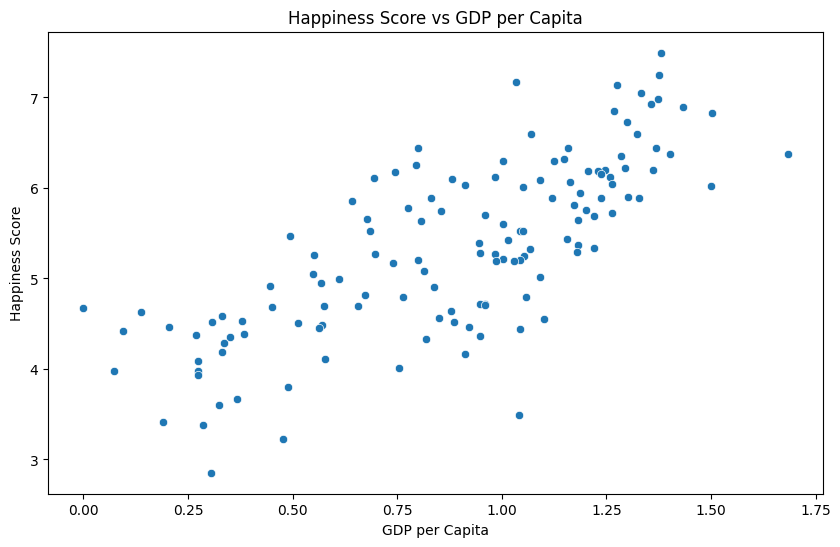

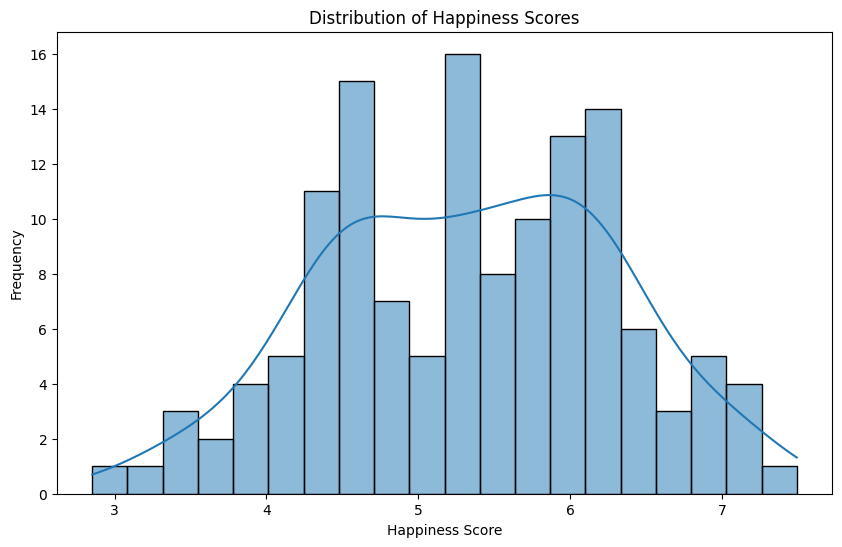

In [21]:
# Visualize two variables
# Scatter plot of GDP per capita vs Happiness Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita', y='Score', data=df_clean)
plt.title('Happiness Score vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

# Histogram of Happiness Score
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Score'], bins=20, kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

In [22]:
# Descriptive statistics
print("\nDescriptive Statistics:")
desc_stats = df_clean[numeric_cols].describe()
print(desc_stats)

print("\nExplanation of Descriptive Statistics:")
print("The descriptive statistics provide measures of central tendency (mean, median) and dispersion (standard deviation, min, max).")
print("For example, the mean Happiness Score is approximately", round(desc_stats.loc['mean', 'Score'], 2),
      "with a standard deviation of", round(desc_stats.loc['std', 'Score'], 2),
      "indicating moderate variability in happiness across countries.")
print("Variables like GDP per capita and Social support show positive skewness, as their means are higher than medians.")


Descriptive Statistics:
            Score  GDP per capita  Social support  Healthy life expectancy  \
count  134.000000      134.000000      134.000000               134.000000   
mean     5.336963        0.883239        1.215619                 0.717769   
std      0.963922        0.371275        0.253318                 0.219601   
min      2.853000        0.000000        0.560000                 0.168000   
25%      4.566000        0.586250        1.056500                 0.552000   
50%      5.331000        0.954500        1.265500                 0.785000   
75%      6.096500        1.182500        1.431750                 0.870250   
max      7.494000        1.684000        1.624000                 1.088000   

       Freedom to make life choices  Generosity  Perceptions of corruption  
count                    134.000000  134.000000                 134.000000  
mean                       0.382776    0.170970                   0.086142  
std                        0.133530    0.

In [23]:
# Develop regression model
features = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
X = df_clean[features]
y = df_clean['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [24]:
# Comment on the regression model
print("\nRegression Model Results:")
print("Features used:", features)
print("R-squared:", round(r2, 4))
print("RMSE:", round(rmse, 4))
print("\nModel Commentary:")
print("The linear regression model predicts Happiness Score using six socio-economic factors.")
print(f"An R-squared value of {round(r2, 4)} indicates that approximately {round(r2*100, 2)}% of the variance in Happiness Score is explained by the model.")
print(f"The RMSE of {round(rmse, 4)} suggests moderate prediction error relative to the Happiness Score range (0-10).")
print("The model is effective but could be improved by exploring non-linear relationships or additional features.")


Regression Model Results:
Features used: ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
R-squared: 0.7465
RMSE: 0.4231

Model Commentary:
The linear regression model predicts Happiness Score using six socio-economic factors.
An R-squared value of 0.7465 indicates that approximately 74.65% of the variance in Happiness Score is explained by the model.
The RMSE of 0.4231 suggests moderate prediction error relative to the Happiness Score range (0-10).
The model is effective but could be improved by exploring non-linear relationships or additional features.
